In [1]:
# IMPORTACIÓN DE LIBRERÍAS
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score
from sklearn.datasets import load_breast_cancer
import warnings
warnings.filterwarnings('ignore')

# Cargar el dataset de Cáncer de Mama de Wisconsin
data = load_breast_cancer()
X = data.data  # Características de las células (30 features)
y = data.target  # Etiquetas: 0=Maligno, 1=Benigno

# Convertir a DataFrame para mejor manipulación
df = pd.DataFrame(X, columns=data.feature_names)
df['diagnosis'] = y

print(f"Dimensiones del dataset: {df.shape}")
print(f"Distribución de clases: {pd.Series(y).value_counts().to_dict()}")
print(f"   - 0: Maligno ({(y == 0).sum()} muestras)")
print(f"   - 1: Benigno ({(y == 1).sum()} muestras)")
print(f" Valores nulos {df.isnull().sum().sum()}")



Dimensiones del dataset: (569, 31)
Distribución de clases: {1: 357, 0: 212}
   - 0: Maligno (212 muestras)
   - 1: Benigno (357 muestras)
 Valores nulos 0


In [2]:
# Aplicar StandardScaler - ESTANDARIZACIÓN OBLIGATORIA PARA SVM
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Datos escalados con StandardScaler")
print(f"   Media después del escalado: {np.mean(X_scaled):.2f}")
print(f"   Desviación estándar después del escalado: {np.std(X_scaled):.2f}")

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, 
    test_size=0.3,       # 30% para prueba, 70% para entrenamiento
    random_state=42,     # Semilla para reproducibilidad
    stratify=y          # Mantener proporción de clases en ambos conjuntos
)

print(f"División de datos:")
print(f"   • Entrenamiento: {X_train.shape[0]} muestras")
print(f"   • Prueba: {X_test.shape[0]} muestras")


Datos escalados con StandardScaler
   Media después del escalado: -0.00
   Desviación estándar después del escalado: 1.00
División de datos:
   • Entrenamiento: 398 muestras
   • Prueba: 171 muestras


In [4]:
print("\nSVM CON KERNEL LINEAL")

"""
**KERNEL LINEAL EN SVM:**

• Busca un HIPERPLANO LINEAL que separe las clases
• Funciona bien cuando los datos son linealmente separables
• Hiperplano: w·x + b = 0 , donde w es el vector normal y b el sesgo
• Margen: distancia entre el hiperplano y los vectores de soporte
"""
svm_linear = SVC(
    kernel='linear', 
    random_state=42,
    C=1.0  
)


# Entrenar el modelo con datos de entrenamiento
svm_linear.fit(X_train, y_train)

# Realizar predicciones
y_pred_linear = svm_linear.predict(X_test)

# Calcular métricas de evaluación
accuracy_linear = accuracy_score(y_test, y_pred_linear)
f1_linear = f1_score(y_test, y_pred_linear)

print(f"   • Precisión (Accuracy): {accuracy_linear:.4f}")
print(f"   • F1-Score: {f1_linear:.4f}")
print(f"   • Vectores de soporte: {len(svm_linear.support_vectors_)}")


SVM CON KERNEL LINEAL
   • Precisión (Accuracy): 0.9825
   • F1-Score: 0.9860
   • Vectores de soporte: 31


In [5]:
print("\n SVM CON KERNEL RBF (NO LINEAL)")

"""
**KERNEL RBF (RADIAL BASIS FUNCTION) - CONCEPTO CLAVE:**

• También conocido como kernel Gaussiano
• MAPEA los datos a un ESPACIO DE MAYOR DIMENSIÓN donde se vuelven linealmente separables
• Fórmula: K(x, y) = exp(-γ * ||x - y||²)
• Donde γ controla la influencia de cada punto individual
"""

svm_rbf = SVC(
    kernel='rbf', 
    random_state=42, 
    C=1.0,  
    gamma='scale' 
)


# Entrenar el modelo con datos de entrenamiento
svm_rbf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rbf = svm_rbf.predict(X_test)

# Calcular métricas de evaluación
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
f1_rbf = f1_score(y_test, y_pred_rbf)

print(f"   • Precisión (Accuracy): {accuracy_rbf:.4f}")
print(f"   • F1-Score: {f1_rbf:.4f}")
print(f"   • Vectores de soporte: {len(svm_rbf.support_vectors_)}")



 SVM CON KERNEL RBF (NO LINEAL)
   • Precisión (Accuracy): 0.9766
   • F1-Score: 0.9813
   • Vectores de soporte: 96


ANÁLISIS VISUAL RÁPIDO: ¿SVM Lineal vs RBF?


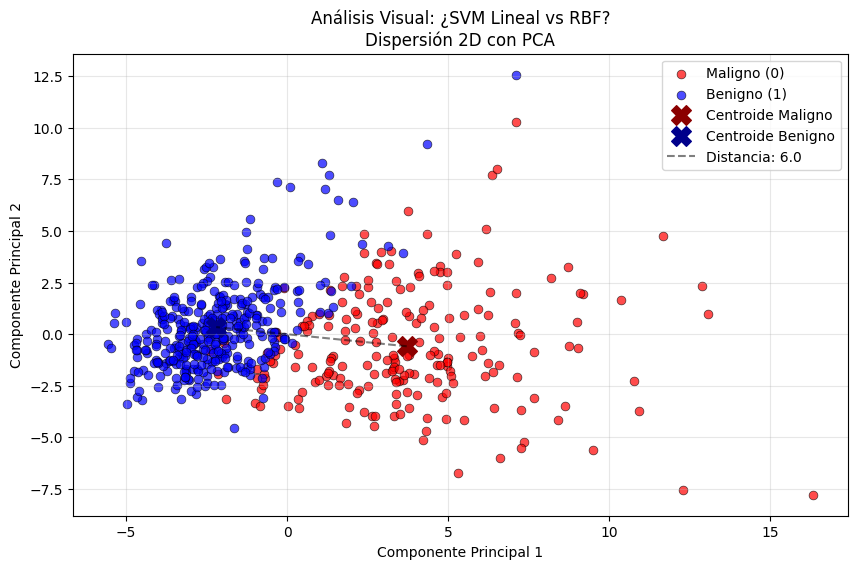

In [7]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np

print("ANÁLISIS VISUAL RÁPIDO: ¿SVM Lineal vs RBF?")

# Aplicar PCA para visualización 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# GRÁFICO ÚNICO CON INFORMACIÓN COMPLETA
plt.figure(figsize=(10, 6))

# Graficar puntos por clase
plt.scatter(X_pca[y == 0, 0], X_pca[y == 0, 1], 
           color='red', alpha=0.7, s=40, label='Maligno (0)', edgecolors='black', linewidth=0.5)
plt.scatter(X_pca[y == 1, 0], X_pca[y == 1, 1], 
           color='blue', alpha=0.7, s=40, label='Benigno (1)', edgecolors='black', linewidth=0.5)

# Calcular métricas rápidas
centroide_0 = X_pca[y == 0].mean(axis=0)
centroide_1 = X_pca[y == 1].mean(axis=0)
distancia_centroides = np.linalg.norm(centroide_0 - centroide_1)

# Marcar centroides
plt.scatter(centroide_0[0], centroide_0[1], color='darkred', s=200, marker='X', label='Centroide Maligno')
plt.scatter(centroide_1[0], centroide_1[1], color='darkblue', s=200, marker='X', label='Centroide Benigno')

# Línea entre centroides
plt.plot([centroide_0[0], centroide_1[0]], [centroide_0[1], centroide_1[1]], 
         'k--', alpha=0.5, label=f'Distancia: {distancia_centroides:.1f}')

# Configuración del gráfico
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análisis Visual: ¿SVM Lineal vs RBF?\nDispersión 2D con PCA')
plt.legend()
plt.grid(True, alpha=0.3)
